Write a quantum circuit that generates the following quantum state:

|ψG⟩ = (|000⟩ + |111⟩) / √2

• Describe your solution.

• Is this state entangled?

• What is the width and the depth of resulting circuit?

• Show the probability distribution for the ”noisy” simulator;

The solution is to adapt the Bell state mentioned in exercise 4 and apply an extra CNOT gate to a third qubit. This way, we'll have 50% chance to measure |000> and 50% chance to measure |111>. 

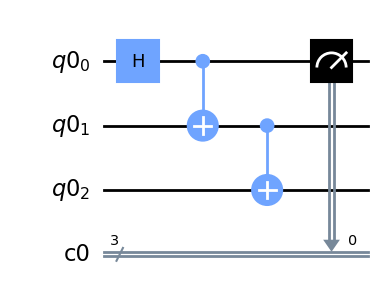

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q_r = QuantumRegister(3)
c_r = ClassicalRegister(3)

circuit = QuantumCircuit(q_r, c_r)
circuit.h(0)
circuit.cnot(0, 1)
circuit.cnot(1, 2)
circuit.measure(0, 0)

# visualize, latex is also supported
circuit.draw(output="mpl")

In [2]:
print("Circuit depth (w/ measurement gate): ", circuit.depth())

Circuit depth (w/ measurement gate):  3


This state is entangled, for the same reasons as exercise 4 (full explanation in the report). In sum, we can know the state of the other 2 qubits after measuring the first one. It'll either be |000> if the first qubit is 0 or |111> if the first qubit is 1.

The width of the circuit is 3, since we use 3 qubits. The depth of the circuit is also 3, since we apply 3 gates at the time we measure the first qubit. The second CNOT can be made in parallel with the measurement gate, so that's why Qiskit's depth is also 3, even if it considers the measurement gate in its calculations.

Let's now run the circuit in a local perfect simulator

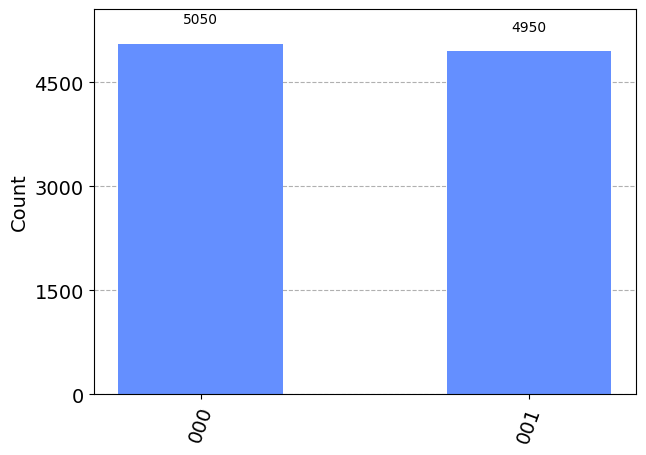

In [3]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('aer_simulator')
job = execute(circuit, simulator, shots=10000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

This time, let's try to run it in a local noisy simulator

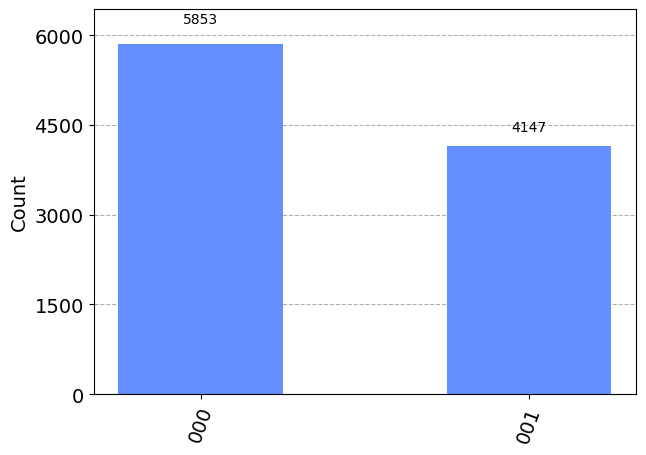

In [4]:
from qiskit.providers.fake_provider import FakeManilaV2

backend = FakeManilaV2()
job = backend.run(circuit, shots=10000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

As we can see, the probability distribution for the noisy simulator looks very different from the perfect one. In a real (and noisy) quantum machine, we don't get a balanced 50/50 distribution.